# Projek Regresi Linier

**Penerapan Analisis Regresi Linier untuk Memprediksi Limit Kredit**

**Pengantar Projek**

Pada projek ini, akan dibuat model Regresi Linier (Sederhana dan Berganda) untuk memprediksi Limit Kredit berdasarkan nilai dari variabel prediktor. Selain itu, analisis ini juga berfungsi untuk mengetahui arah dan seberapa besar pengaruh variabel prediktor terhadap Limit Kredit.

**Regresi Linier (_Linear Regression_)**

Regresi Linier adalah suatu metode _Supervised Learning_ untuk mengkaji hubungan variabel respon ($Y$) dengan variabel prediktor ($X$). Jika banyaknya variabel prediktor hanya satu, maka disebut **Regresi Linier Sederhana (_Simple Linear Regression_)**. Sedangkan jika terdapat lebih dari satu variabel prediktor, maka disebut **Regresi Linier Berganda (_Multiple Linear Regression_)**.

Model Regresi Linier Sederhana memiliki bentuk persamaan:

$Y = \beta_0 +\beta_1 X + \epsilon$

Sementara model Regresi Linier Berganda untuk $p$ variabel prediktor memiliki bentuk persamaan:

$Y = \beta_0 + \beta_1 X_1 + ... + \beta_p X_p +\epsilon$

di mana variabel $Y$ disebut variabel respon, variabel $X_1, ..., X_p$ disebut variabel prediktor, $\beta_0, \beta_1, ..., \beta_p$ adalah parameter yang nilainya tidak diketahui, dan $\epsilon$ adalah nilai galat acak (_random error_).

Parameter $\beta$ dari model regresi dapat diestimasi dengan meminimumkan jumlah kuadrat residual atau yang dikenal dengan _Ordinary Least Square_ (OLS). Secara matematis estimasi nilai $\beta$ dihitung dengan rumus

$\hat{\beta} = (X^TX)$<sup>-1</sup>$X^TY$


**Kebaikan Model Regresi**

Kebaikan model regresi dapat dilihat pada nilai **Koefisien Determinasi ($R^2$)**. Koefisien determinasi menyatakan besarnya keragaman variabel respon ($Y$) yang dapat dijelaskan oleh variabel prediktor ($X$). Nilai koefisien determinasi berkisar dari $0-100 \%$. Semakin besar nilai koefisien determinasi, maka semakin baik modelnya. Nilai $R^2$ dapat dihitung dengan rumus berikut:

$R^2 = 1 - \frac{SSR}{SST}$

di mana

$SSR = ∑ (Y - \hat{Y})^2$ atau Sum of Squares Residual, dan

$SST = ∑ (Y - \bar{Y})^2$ atau Sum of Squares Total.

**Asumsi pada Analisis Regresi Linier**

Terdapat beberapa asumsi yang digunakan dalam analisis regresi linier untuk menjamin model yang dihasilkan valid dan tidak bias. Asumsi-asumsi tersebut antara lain sebagai berikut:

1.   Kenormalan Residual

 Untuk mengecek residual berdistribusi normal dapat dilihat dari Q-Q Plot atau melalui uji Shapiro-Wilk. Residual berdistribusi normal apabila data menyebar di sekitar garis diagonal atau _p-value_ $>5\%$ pada uji Shapiro-Wilk. Uji Shapiro-Wilk dapat dilakukan dengan fungsi `shapiro.test()` yang tersedia di R.
2.   Kehomogenan Ragam Residual

 Untuk mengecek kehomogenan ragam dari residual dapat digunakan uji Goldfeld-Quant yang tersedia pada package `lmtest`. Ragam dari residual bersifat homogen apabila _p-value_ $>5\%$.
3.   Kebebasan Residual

 Untuk mengecek kebebasan residual dapat digunakan uji Durbin-Watson yang tersedia pada package `lmtest`, di mana residual dikatakan saling bebas apabila _p-value_ $>5\%$.
4.   Bebas Multikolinieritas (Untuk Regresi Linier Berganda)

 Regresi linier berganda melibatkan lebih dari satu variabel prediktor. Antar variabel prediktor tersebut harus saling bebas atau tidak berkorelasi satu sama lain. Untuk melihat ada tidaknya kondisi multikolinearitas (korelasi yang tinggi) pada variabel-variabel prediktor dapat digunakan ukuran VIF (_Variance Inflation Factor_). Nilai VIF di atas 5 (atau referensi lain menyebut di atas 10) mengindikasikan adanya kondisi multikolinearitas. Nilai VIF dapat dihitung dengan fungsi `vif` yang tersedia pada package `car`.


**Ukuran Ketepatan Model**

Terdapat beberapa ukuran yang dapat digunakan untuk menghitung tingkat ketepatan model dalam memprediksi variabel respon, antara lain sebagai berikut

1. Root of Mean Squared Error (RMSE)

 RMSE = $\sqrt{\frac{1}{n} \sum_{i=1}^{n}(Y_i - \hat{Y_i})^2}$
2. Mean Absolute Error (MAE)

 MAE = $\frac{1}{n} \sum_{i=1}^{n}|Y_i - \hat{Y_i}|$
3. Mean Absolute Percentage Error (MAPE)

 MAPE = $\frac{1}{n} \sum_{i=1}^{n} \frac{|Y_i - \hat{Y_i}|}{Y_i} \times 100 \%$

#Penyiapan Data

In [ ]:
# Install packages yang diperlukan
install.packages("corrplot") # Plot matriks korelasi
install.packages("lmtest") # Uji kehomogenan ragam dan kebebasan residual
install.packages("MASS") # Regresi linier
install.packages("car") # Uji multikolinieritas
install.packages("cowplot") # Membuat plotlist
install.packages("tidyverse") # Analisis data
install.packages("caret") # Pembagian data

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Mengaktifkan packages yang diperlukan
library(corrplot)
library(lmtest)
library(MASS)
library(car)
library(cowplot)
library(tidyverse)
library(caret)

Data yang digunakan dapat diunduh pada: [limit_kredit.csv](https://docs.google.com/spreadsheets/d/12xoEsBE7ELzcGvhVOZMJ25Qzl_6lYI6FnG-dl_MKEvM/edit?usp=sharing)

In [ ]:
# Input data
library(googledrive)

file_id <- "1vtkmUjsx1jSL2VPsTqBIfU09Jv9wosunDrrQ2QYdSVo"
temp_file <- tempfile(fileext = ".csv")
drive_download(as_id(file_id), path = temp_file)

data <- read.csv(temp_file)

File downloaded:

• 'limit_kredit (1)' <id: 1vtkmUjsx1jSL2VPsTqBIfU09Jv9wosunDrrQ2QYdSVo>

Saved locally as:

• /tmp/Rtmpq31uyW/fileb98529fa8.csv



In [ ]:
head(data)

,NAMA,EVENT,STATUS,JK,USIA,STATUS_NIKAH,JML_TANGGUNGAN,STATUS_TT,PENDIDIKAN,WILAYAH,PEKERJAAN,LAMA_BEKERJA,PENGHASILAN,DBR,WAKTU_KREDIT,LIMIT_KREDIT,STATUS_KREDIT,PENDIDIKAN_KODE,PENDIDIKAN2
,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>,<chr>,<int>,<chr>
1,A123145,36,NEW,LAKI LAKI,44,MENIKAH,2,Milik Sendiri,SMA,Balikpapan,Pegawai swasta,14,2829819,0.45,36,23000000,LANCAR,3,3. SMA
2,A118717,48,NEW,LAKI LAKI,53,MENIKAH,2,Milik Sendiri,SMA,Balikpapan,Pegawai BUMN,25,23757496,0.37,48,300000000,LANCAR,3,3. SMA
3,A125680,24,NEW,PEREMPUAN,28,MENIKAH,2,Milik Sendiri,SMA,Balikpapan,Pegawai swasta,6,2733000,0.45,24,16000000,LANCAR,3,3. SMA
4,A14798,60,NEW,LAKI LAKI,45,MENIKAH,3,Milik Sendiri,SMA,Medan,Pegawai swasta,15,3000000,0.42,60,50000000,LANCAR,3,3. SMA
5,A142852,24,NEW,PEREMPUAN,44,MENIKAH,1,Milik Orang Tua,S1,Jakarta 5,Pegawai swasta,3,4195200,0.35,24,28000000,LANCAR,5,5. S1
6,A96802,24,NEW,PEREMPUAN,51,MENIKAH,3,Milik Sendiri,SMA,Jakarta 4,PNS,10,8883124,0.49,24,90000000,LANCAR,3,3. SMA


In [ ]:
# Ukuran data
dim(data)

[1] 500  19

In [ ]:
# Struktur data
str(data)

'data.frame':	500 obs. of  19 variables:
 $ NAMA           : chr  "A123145" "A118717" "A125680" "A14798" ...
 $ EVENT          : int  36 48 24 60 24 24 60 36 60 18 ...
 $ STATUS         : chr  "NEW" "NEW" "NEW" "NEW" ...
 $ JK             : chr  "LAKI LAKI" "LAKI LAKI" "PEREMPUAN" "LAKI LAKI" ...
 $ USIA           : int  44 53 28 45 44 51 28 32 43 56 ...
 $ STATUS_NIKAH   : chr  "MENIKAH" "MENIKAH" "MENIKAH" "MENIKAH" ...
 $ JML_TANGGUNGAN : int  2 2 2 3 1 3 0 0 1 3 ...
 $ STATUS_TT      : chr  "Milik Sendiri" "Milik Sendiri" "Milik Sendiri" "Milik Sendiri" ...
 $ PENDIDIKAN     : chr  "SMA" "SMA" "SMA" "SMA" ...
 $ WILAYAH        : chr  "Balikpapan" "Balikpapan" "Balikpapan" "Medan" ...
 $ PEKERJAAN      : chr  "Pegawai swasta" "Pegawai BUMN" "Pegawai swasta" "Pegawai swasta" ...
 $ LAMA_BEKERJA   : int  14 25 6 15 3 10 5 1 3 10 ...
 $ PENGHASILAN    : int  2829819 23757496 2733000 3000000 4195200 8883124 4943520 3749812 5000000 10672327 ...
 $ DBR            : num  0.45 0.37 0.45 0.4

In [ ]:
data[c("PENDIDIKAN", "PENDIDIKAN_KODE", "PENDIDIKAN2")]

PENDIDIKAN,PENDIDIKAN_KODE,PENDIDIKAN2
<chr>,<int>,<chr>
SMA,3,3. SMA
SMA,3,3. SMA
SMA,3,3. SMA
SMA,3,3. SMA
S1,5,5. S1
SMA,3,3. SMA
DIPLOMA,4,4. DIPLOMA
S1,5,5. S1
SMA,3,3. SMA


In [ ]:
unique(data$PENDIDIKAN2)

[1] "3. SMA"     "5. S1"      "4. DIPLOMA" "1. SD"      "6. S2/S3"  
[6] "2. SMP"

Oleh karena variabel `PENDIDIKAN`, `PENDIDIKAN_KODE`, dan `PENDIDIKAN2` berisi informasi yang sama, maka cukup dipakai salah satu saja. Pada projek ini, akan digunakan variabel `PENDIDIKAN_KODE`.

In [ ]:
# Hapus variabel PENDIDIKAN dan PENDIDIKAN2
data$PENDIDIKAN <- NULL
data$PENDIDIKAN2 <- NULL

# Mengubah tipe data PENDIDIKAN_KODE menjadi Faktor
data$PENDIDIKAN_KODE <- as.factor(data$PENDIDIKAN_KODE)

In [ ]:
dim(data)

[1] 500  17

In [ ]:
# Cek data duplikat
sum(duplicated(data))

[1] 0

In [ ]:
# Cek missing value
colSums(is.na(data))

NAMA           EVENT          STATUS              JK            USIA 
              0               0               0               0               0 
   STATUS_NIKAH  JML_TANGGUNGAN       STATUS_TT         WILAYAH       PEKERJAAN 
              0               0               0               0               0 
   LAMA_BEKERJA     PENGHASILAN             DBR    WAKTU_KREDIT    LIMIT_KREDIT 
              0               0               0               0               0 
  STATUS_KREDIT PENDIDIKAN_KODE 
              0               0

In [ ]:
# Menghapus variabel NAMA
data$NAMA <- NULL

In [ ]:
# Menyesuaikan tipe data kategorik
data <- data %>% mutate_if(is.character, as.factor)

In [ ]:
str(data)

'data.frame':	500 obs. of  16 variables:
 $ EVENT          : int  36 48 24 60 24 24 60 36 60 18 ...
 $ STATUS         : Factor w/ 2 levels "NEW","TOP": 1 1 1 1 1 1 1 1 1 1 ...
 $ JK             : Factor w/ 2 levels "LAKI LAKI","PEREMPUAN": 1 1 2 1 2 2 1 2 1 1 ...
 $ USIA           : int  44 53 28 45 44 51 28 32 43 56 ...
 $ STATUS_NIKAH   : Factor w/ 3 levels "CERAI","MENIKAH",..: 2 2 2 2 2 2 3 2 2 2 ...
 $ JML_TANGGUNGAN : int  2 2 2 3 1 3 0 0 1 3 ...
 $ STATUS_TT      : Factor w/ 5 levels "Kredit","Milik Orang Tua",..: 3 3 3 3 2 3 4 2 3 3 ...
 $ WILAYAH        : Factor w/ 12 levels "Balikpapan","Bandung",..: 1 1 1 9 6 5 9 6 6 10 ...
 $ PEKERJAAN      : Factor w/ 3 levels "Pegawai BUMN",..: 2 1 2 2 2 3 1 2 2 3 ...
 $ LAMA_BEKERJA   : int  14 25 6 15 3 10 5 1 3 10 ...
 $ PENGHASILAN    : int  2829819 23757496 2733000 3000000 4195200 8883124 4943520 3749812 5000000 10672327 ...
 $ DBR            : num  0.45 0.37 0.45 0.42 0.35 0.49 0.51 0.23 0.2 0.15 ...
 $ WAKTU_KREDIT   : int  36 48 2

In [ ]:
# Ringkasan statistik data
summary(data)

     EVENT        STATUS            JK           USIA              STATUS_NIKAH
 Min.   :  6.00   NEW:419   LAKI LAKI:391   Min.   :22.00   CERAI        :  5  
 1st Qu.: 24.00   TOP: 81   PEREMPUAN:109   1st Qu.:30.00   MENIKAH      :384  
 Median : 36.00                             Median :34.00   TIDAK MENIKAH:111  
 Mean   : 45.34                             Mean   :36.54                      
 3rd Qu.: 60.00                             3rd Qu.:43.00                      
 Max.   :120.00                             Max.   :59.00                      
                                                                               
 JML_TANGGUNGAN            STATUS_TT         WILAYAH             PEKERJAAN  
 Min.   :0.000   Kredit         :  2   Jakarta 5 : 73   Pegawai BUMN  : 44  
 1st Qu.:0.000   Milik Orang Tua:150   Surabaya  : 67   Pegawai swasta:410  
 Median :1.000   Milik Sendiri  :240   Medan     : 65   PNS           : 46  
 Mean   :1.472   Rumah Dinas    : 47   Jakarta 4 : 6

Untuk melihat korelasi antara 2 variabel dapat menggunakan fungsi `cor`. Jika ingin menghitung korelasi Spearman khususnya pada data rank, maka dapat mengatur argumen untuk parameter `method` dengan nilai `"spearman"`.

In [ ]:
# Korelasi antarvariabel numerik
num.data <- data %>% select_if(is.numeric)
corr_matrix <- cor(num.data)
round(corr_matrix, 3)

,EVENT,USIA,JML_TANGGUNGAN,LAMA_BEKERJA,PENGHASILAN,DBR,WAKTU_KREDIT,LIMIT_KREDIT
EVENT,1.000,0.070,0.055,0.111,0.095,0.122,0.578,0.339
USIA,0.070,1.000,0.618,0.653,0.301,-0.088,-0.047,0.197
JML_TANGGUNGAN,0.055,0.618,1.000,0.437,0.159,-0.116,0.016,0.089
LAMA_BEKERJA,0.111,0.653,0.437,1.000,0.185,-0.021,0.096,0.243
PENGHASILAN,0.095,0.301,0.159,0.185,1.000,-0.147,0.080,0.628
DBR,0.122,-0.088,-0.116,-0.021,-0.147,1.000,0.372,0.344
WAKTU_KREDIT,0.578,-0.047,0.016,0.096,0.080,0.372,1.000,0.593
LIMIT_KREDIT,0.339,0.197,0.089,0.243,0.628,0.344,0.593,1.000


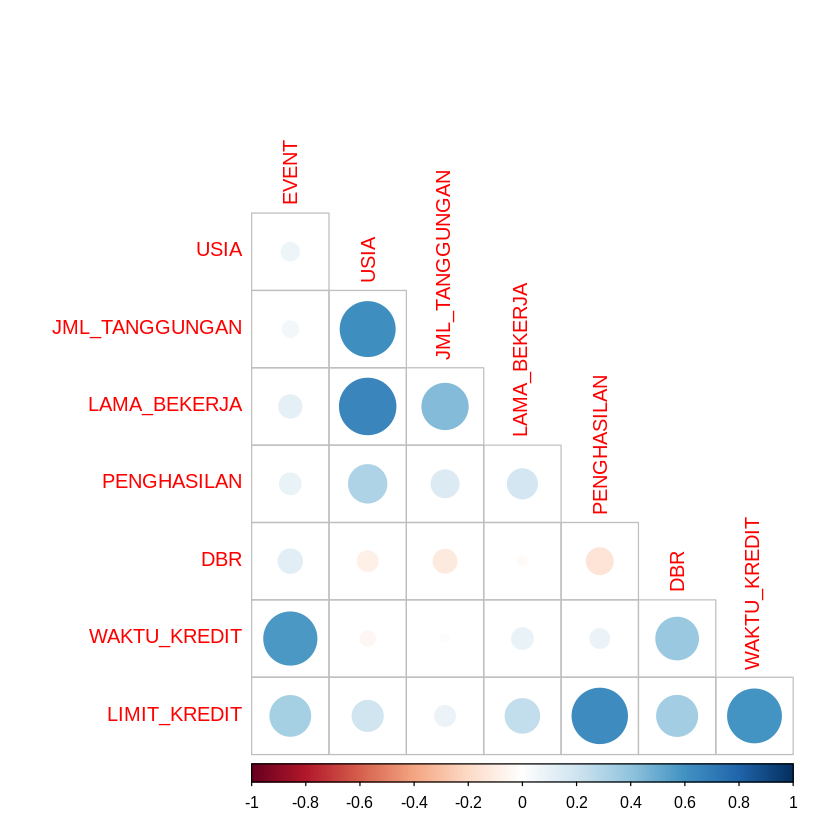

In [ ]:
# Plot matriks korelasi
corrplot(round(corr_matrix,3), method="circle", type = "lower", diag = F)

Dari plot korelasi di atas, terlihat bahwa variabel `PENGHASILAN` dan `WAKTU_KREDIT` memiliki hubungan yang erat dengan `LIMIT_KREDIT` yang ditunjukkan dengan nilai korelasi yang tinggi.

In [ ]:
# Korelasi Spearman untuk menyatakan korelasi variabel numerik dan kategorik
cat("Korelasi PENDIDIKAN_KODE dengan LIMIT_KREDIT -->",
    round(cor(as.integer(data$PENDIDIKAN_KODE), data$LIMIT_KREDIT, method="spearman"),3), "\n")
cat("Korelasi PENDIDIKAN_KODE dengan PENGHASILAN -->",
    round(cor(as.integer(data$PENDIDIKAN_KODE), data$PENGHASILAN, method="spearman"),3), "\n")
cat("Korelasi STATUS_NIKAH dengan LIMIT_KREDIT -->",
    round(cor(as.integer(data$STATUS_NIKAH), data$LIMIT_KREDIT, method="spearman"),3), "\n")
cat("Korelasi STATUS_TT dengan LIMIT_KREDIT -->",
    round(cor(as.integer(data$STATUS_TT), data$LIMIT_KREDIT, method="spearman"),3), "\n")
cat("Korelasi PEKERJAAN dengan LIMIT_KREDIT -->",
    round(cor(as.integer(data$PEKERJAAN), data$LIMIT_KREDIT, method="spearman"),3), "\n")

Korelasi PENDIDIKAN_KODE dengan LIMIT_KREDIT --> 0.124 
Korelasi PENDIDIKAN_KODE dengan PENGHASILAN --> 0.222 
Korelasi STATUS_NIKAH dengan LIMIT_KREDIT --> -0.137 
Korelasi STATUS_TT dengan LIMIT_KREDIT --> 0.118 
Korelasi PEKERJAAN dengan LIMIT_KREDIT --> -0.075 


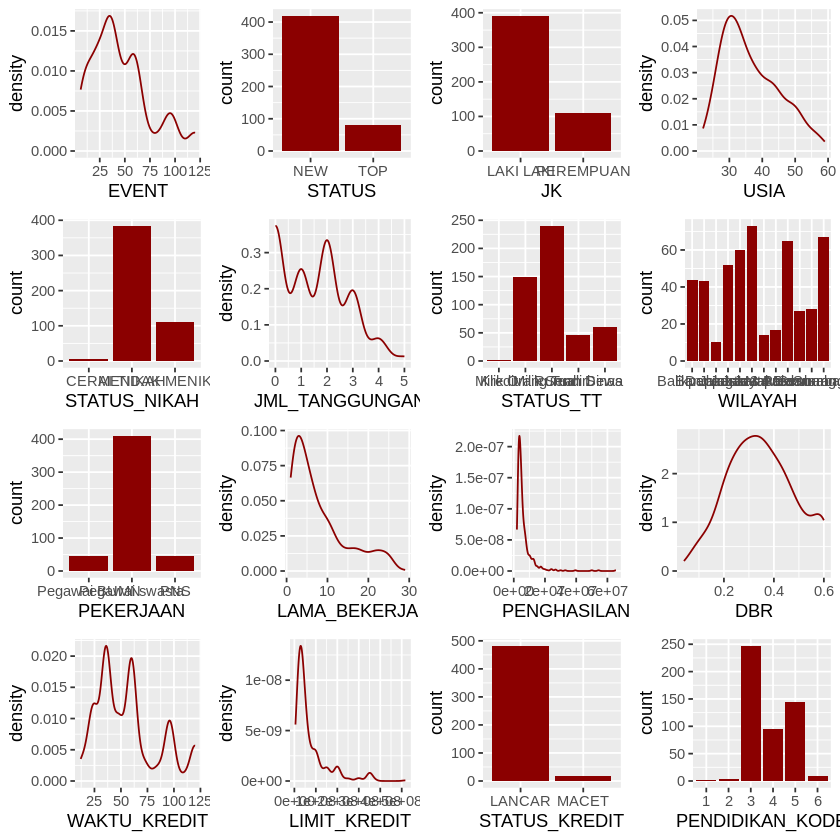

In [ ]:
# Plot-plot untuk setiap variabel
# Jika bertipe numerik buat density plot
# Jika bertipe kategorik buat barplot

plots <- lapply(colnames(data), function(var_x){
  p <-
    ggplot(data, aes_string(x=var_x))
    if(is.numeric(data[[var_x]])) {
      p <- p + geom_density(lwd=0.5, color="darkred")

    } else {
      p <- p + geom_bar(fill="darkred")
    }
})


plot_grid(plotlist = plots, ncol=4)


Berdasarkan plot di atas, variabel `LIMIT_KREDIT` terlihat mengandung banyak outlier, ditunjukkan dari density plot yang memiliki ekor panjang di kanan.

# Regresi Linier Sederhana
Pada bagian sebelumnya, diketahui variabel `PENGHASILAN` memiliki hubungan yang cukup dekat dengan variabel `LIMIT_KREDIT` dengan korelasi sebesar 0.628. Oleh karena itu, pada bagian ini akan dibangun model regresi linier sederhana dengan variabel `LIMIT_KREDIT` sebagai variabel respon dan `PENGHASILAN` sebagai variabel prediktor.

In [ ]:
data.reg <- data[c("LIMIT_KREDIT", "PENGHASILAN")]
head(data.reg)

,LIMIT_KREDIT,PENGHASILAN
,<int>,<int>
1,23000000,2829819
2,300000000,23757496
3,16000000,2733000
4,50000000,3000000
5,28000000,4195200
6,90000000,8883124


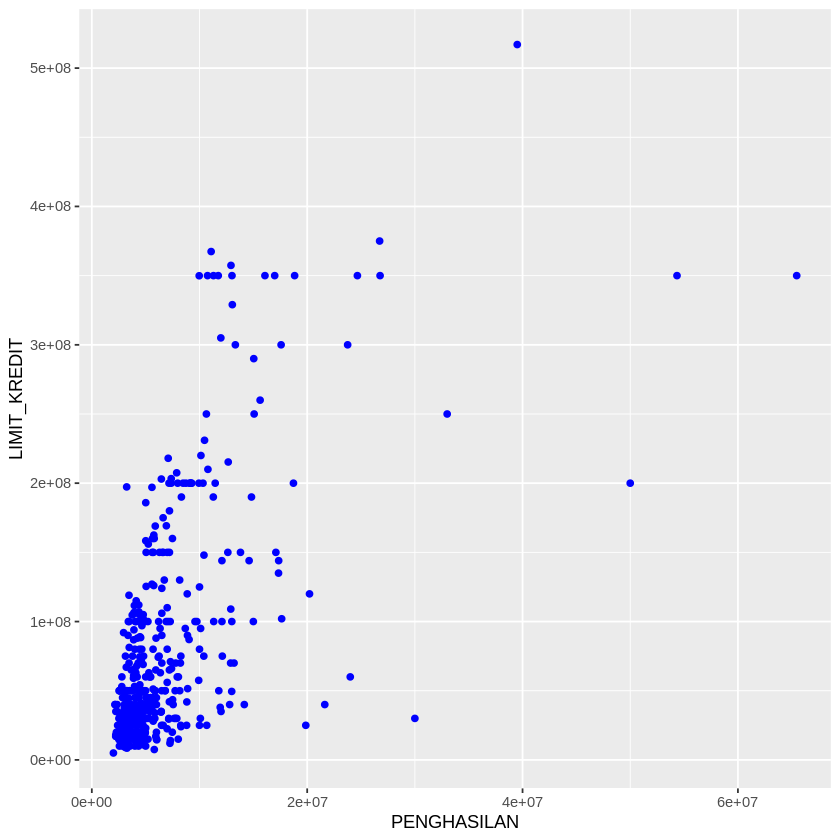

In [ ]:
ggplot(data.reg, aes(PENGHASILAN, LIMIT_KREDIT))+
  geom_point(col="blue")

## Model 1

In [ ]:
model.1 <- lm(LIMIT_KREDIT ~ PENGHASILAN, data=data.reg)

summary(model.1)


Call:
lm(formula = LIMIT_KREDIT ~ PENGHASILAN, data = data.reg)

Residuals:
       Min         1Q     Median         3Q        Max 
-241548318  -30563160  -19034577   15820323  253846561 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.101e+07  4.059e+06   5.177 3.28e-07 ***
PENGHASILAN 8.351e+00  4.643e-01  17.988  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 61980000 on 498 degrees of freedom
Multiple R-squared:  0.3938,	Adjusted R-squared:  0.3926 
F-statistic: 323.6 on 1 and 498 DF,  p-value: < 2.2e-16


Model 1 memiliki nilai $R^2$ sebesar $39\%$. Ini artinya $39\%$ keragaman LIMIT_KREDIT dapat dijelaskan oleh variabel PENGHASILAN.

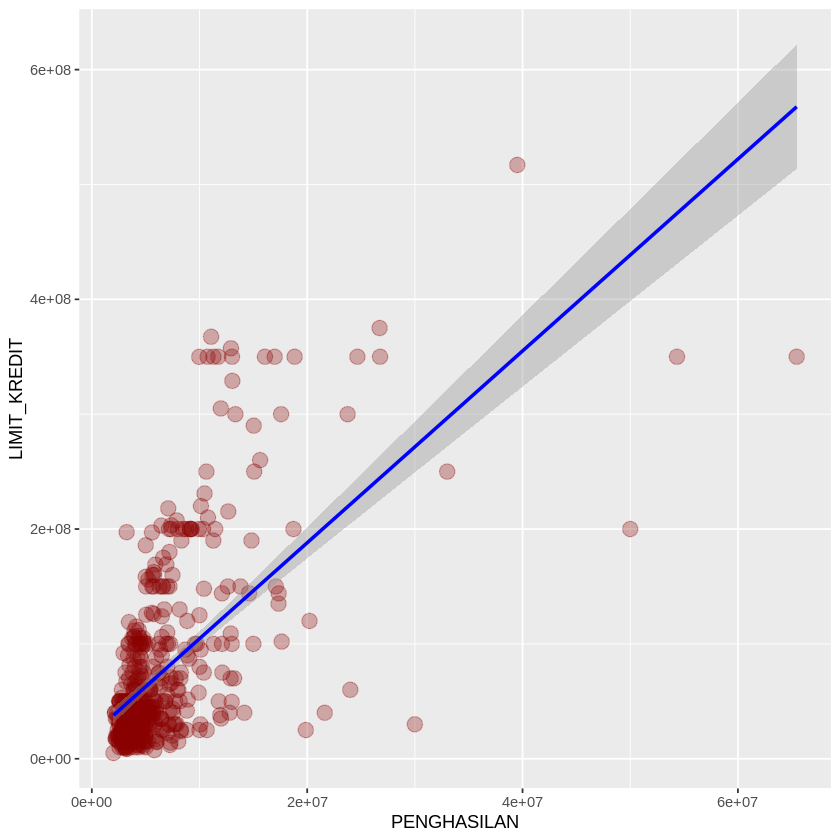

In [ ]:
library(ggplot2)

# Membuat scatter plot
scatter_plot <- ggplot(data = data.reg, aes(x = PENGHASILAN, y = LIMIT_KREDIT)) +
  # Menambahkan titik-titik scatter plot
  geom_point(color="darkred", size=4, alpha=0.3) +
  # Menambahkan garis regresi
  geom_smooth(method = "lm",
              formula = y ~ x,
              se = T, # Menambahkan C.I
              color = "blue")

# Menampilkan scatter plot
scatter_plot

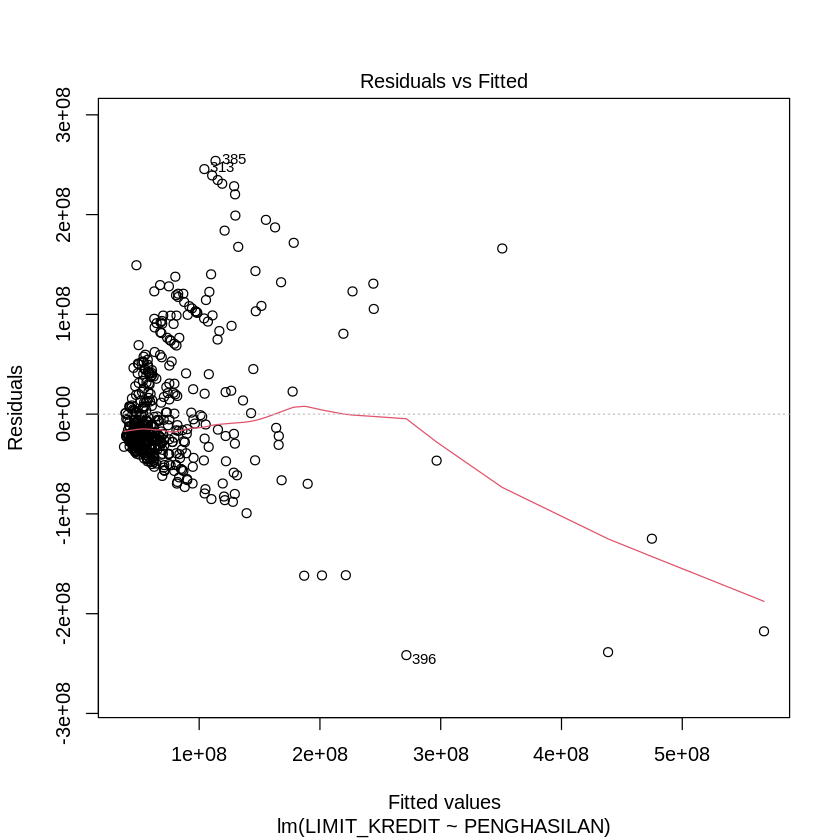

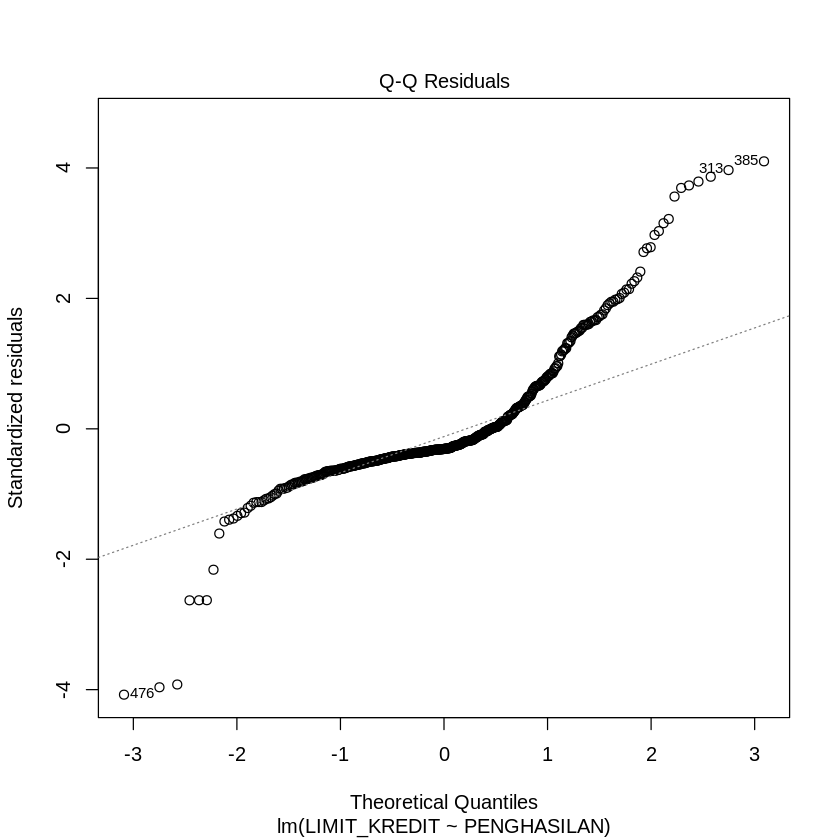

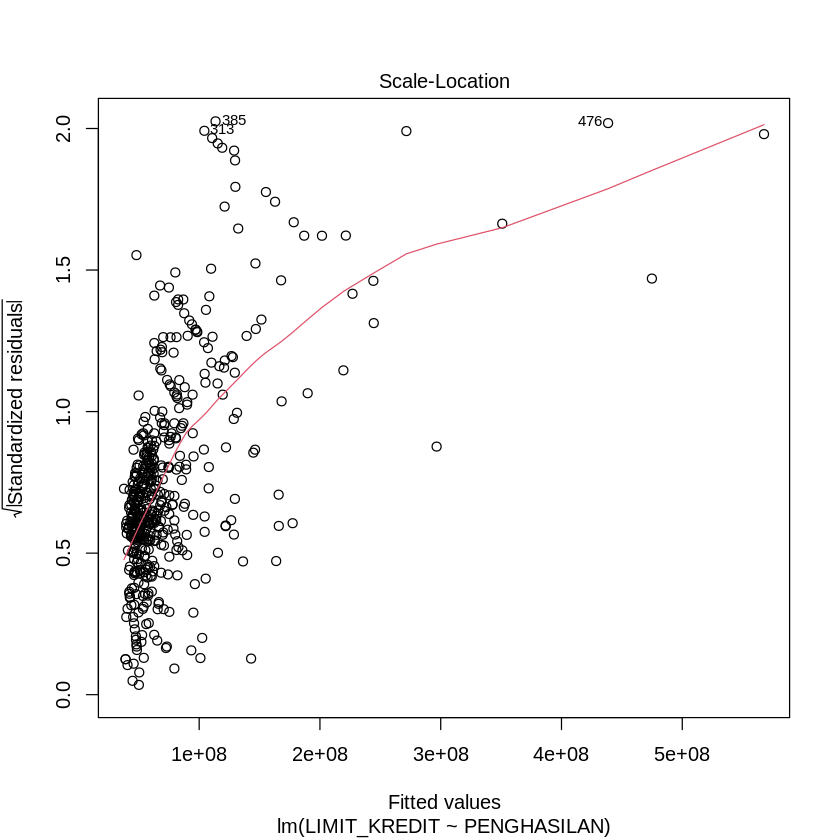

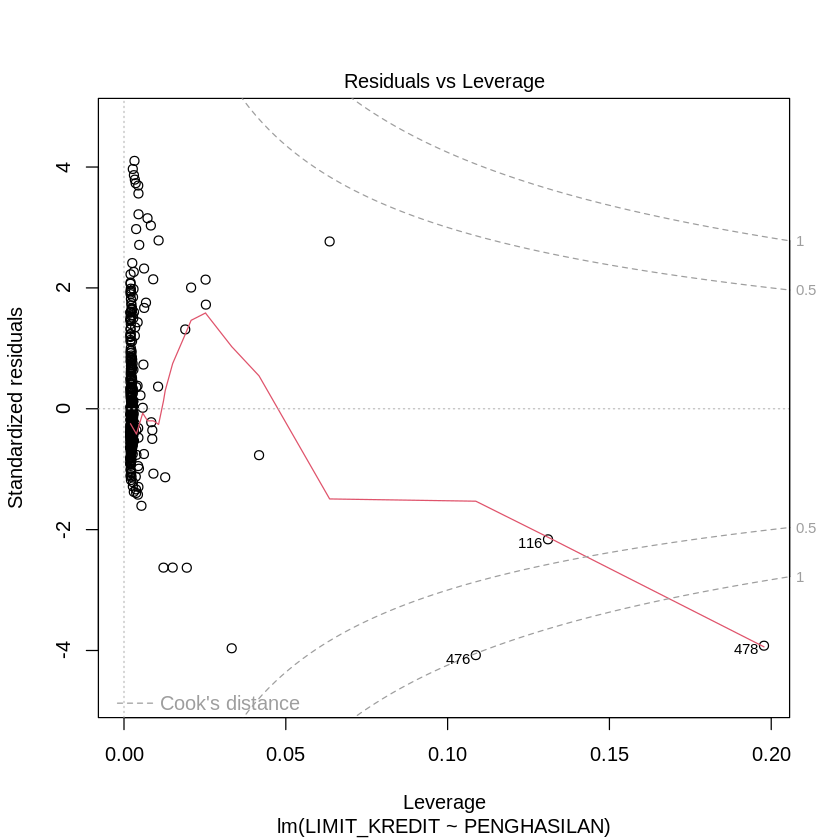

In [ ]:
plot(model.1)


	Shapiro-Wilk normality test

data:  res.model.1
W = 0.84589, p-value < 2.2e-16


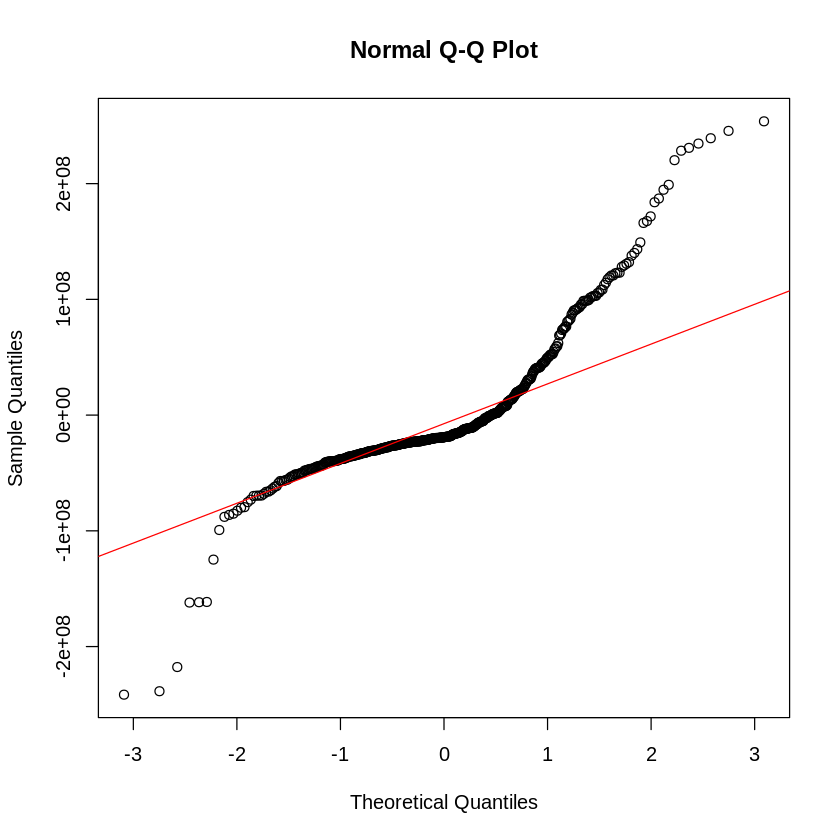

In [ ]:
# Uji kenormalan residual
res.model.1 <- residuals(model.1)
qqnorm(res.model.1)
qqline(res.model.1, col="red")

# Mengecek apakah residual menyebar Normal
shapiro.test(res.model.1)

Dari plot di atas, dapat disimpulkan bahwa residual dari model 1 tidak berdistribusi normal.

## Model 2 (Transformasi Logaritma)

Pada bagian sebelumnya telah ditampilkan plot densitas untuk setiap variabel numerik. Pada plot-plot tersebut, variabel `LIMIT_KREDIT` dan `PENGHASILAN` terlihat memiliki kemenjuluran ke kanan yang sangat besar. Oleh karena itu, pada bagian ini akan dilakukan Transformasi Logaritma terhadap kedua variabel, setelah itu dibuat kembali model regresinya.

In [ ]:
data.log <- log(data.reg)

model.2 <- lm(LIMIT_KREDIT ~ PENGHASILAN, data=data.log)
summary(model.2)


Call:
lm(formula = LIMIT_KREDIT ~ PENGHASILAN, data = data.log)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.22586 -0.44672 -0.05501  0.51649  1.86892 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.34445    0.83985   2.792  0.00545 ** 
PENGHASILAN  0.99311    0.05427  18.299  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6872 on 498 degrees of freedom
Multiple R-squared:  0.4021,	Adjusted R-squared:  0.4009 
F-statistic: 334.9 on 1 and 498 DF,  p-value: < 2.2e-16


Model 2 memiliki nilai $R^2$ yang tidak jauh berbeda dengan model sebelumnya, yaitu sebesar $40\%$.

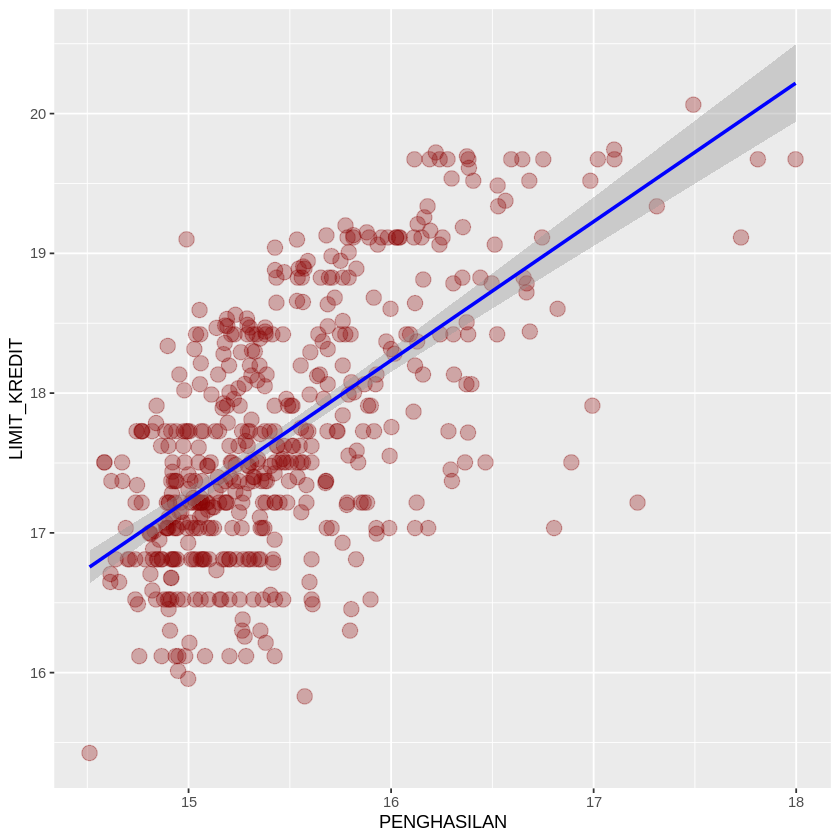

In [ ]:
scatter_plot <- ggplot(data = data.log, aes(x = PENGHASILAN, y = LIMIT_KREDIT)) +
  geom_point(color="darkred", size=4, alpha=0.3) +
  geom_smooth(method = "lm",
              formula = y ~ x,
              se = T, # Menambahkan C.I
              color = "blue")

# Menampilkan scatter plot
scatter_plot

Dari plot di atas, garis regresi yang dihasilkan lebih baik dari model 1.

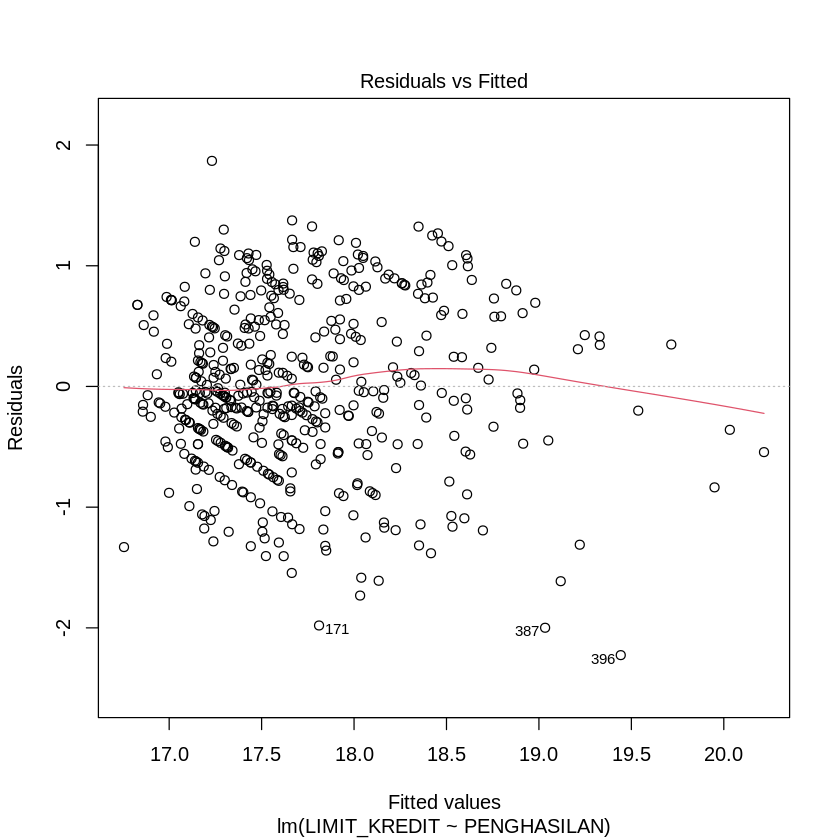

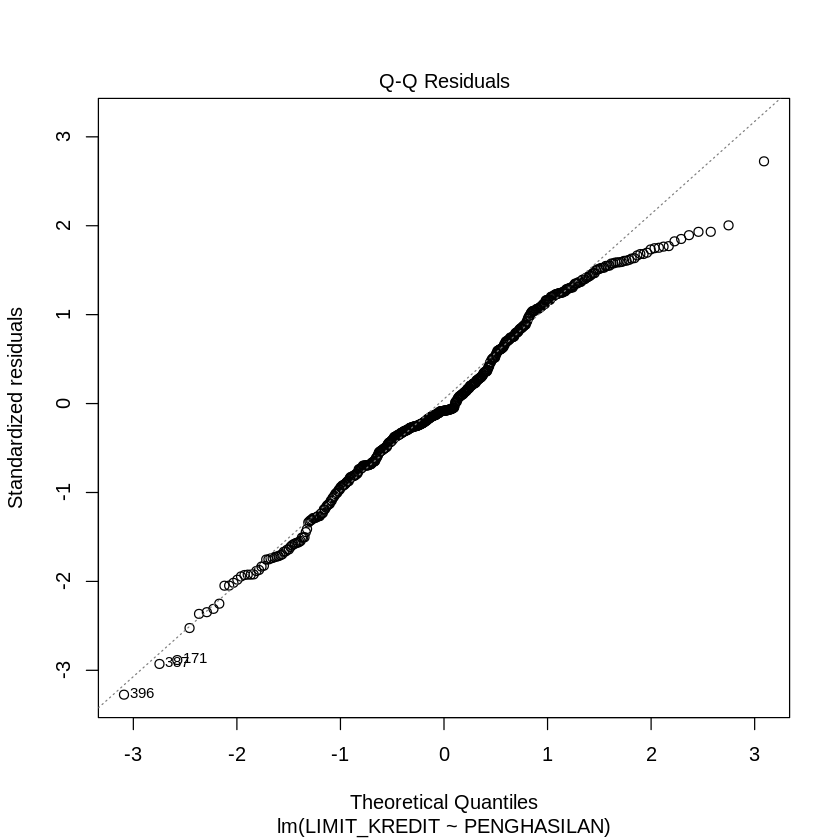

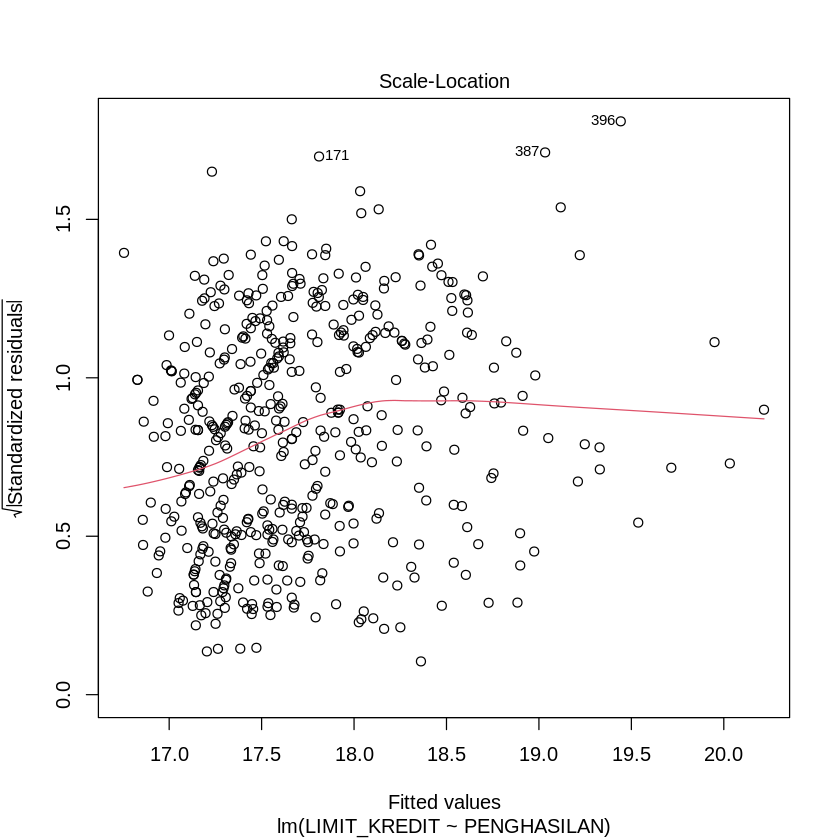

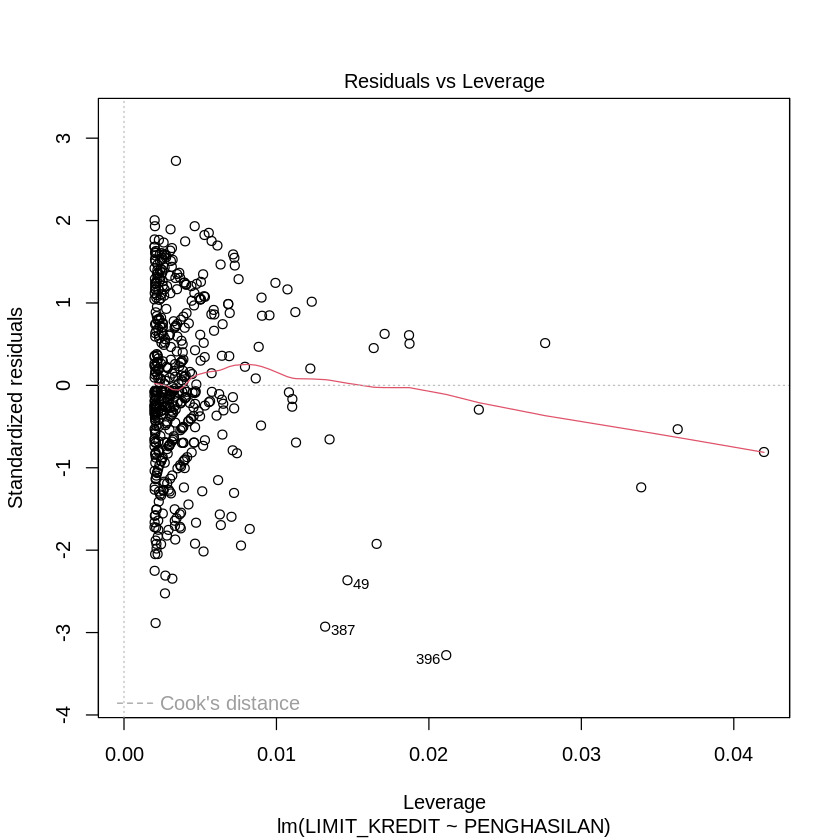

In [ ]:
plot(model.2)

In [ ]:
# Cek kenormalan residual
shapiro.test(residuals(model.2))


	Shapiro-Wilk normality test

data:  residuals(model.2)
W = 0.98735, p-value = 0.0002497


Dari uji Shapiro-Wilk diperoleh residual dari model 2 tidak berdistribusi normal.

# Regresi Linier Berganda



Model regresi linier sederhana yang telah dibuat hanya mampu menghasilkan nilai $R^2$ sebesar $40\%$. Untuk meningkatkan nilai $R^2$, dapat ditambahkan variabel lain sebagai variabel prediktor.

##Slicing Data

In [ ]:
colnames(data)

[1] "EVENT"           "STATUS"          "JK"              "USIA"           
 [5] "STATUS_NIKAH"    "JML_TANGGUNGAN"  "STATUS_TT"       "WILAYAH"        
 [9] "PEKERJAAN"       "LAMA_BEKERJA"    "PENGHASILAN"     "DBR"            
[13] "WAKTU_KREDIT"    "LIMIT_KREDIT"    "STATUS_KREDIT"   "PENDIDIKAN_KODE"

Dataset yang digunakan memiliki cukup banyak variabel. Pada bagian ini, akan dibuat model regresi linier berganda dengan melibatkan semua variabel numerik dan satu variabel kategorik yaitu `PEKERJAAN`.

In [ ]:
columns <- c("LIMIT_KREDIT", "USIA","JML_TANGGUNGAN", "PEKERJAAN",
              "LAMA_BEKERJA", "PENGHASILAN","DBR", "WAKTU_KREDIT")

# slicing data yang diperlukan
data.reg.mul <- data[columns]

head(data.reg.mul)

,LIMIT_KREDIT,USIA,JML_TANGGUNGAN,PEKERJAAN,LAMA_BEKERJA,PENGHASILAN,DBR,WAKTU_KREDIT
,<int>,<int>,<int>,<fct>,<int>,<int>,<dbl>,<int>
1,23000000,44,2,Pegawai swasta,14,2829819,0.45,36
2,300000000,53,2,Pegawai BUMN,25,23757496,0.37,48
3,16000000,28,2,Pegawai swasta,6,2733000,0.45,24
4,50000000,45,3,Pegawai swasta,15,3000000,0.42,60
5,28000000,44,1,Pegawai swasta,3,4195200,0.35,24
6,90000000,51,3,PNS,10,8883124,0.49,24


In [ ]:
dim(data.reg.mul)

[1] 500   8

##Pembagian Data Latih dan Data Uji

In [ ]:
# Membagi data latih dan data uji

set.seed(123)  # Untuk hasil yang dapat direproduksi

# Fungsi createDataPartition dari paket caret untuk membagi data
# dengan menghasilkan indeks data latih dan data uji
latihIndeks <- createDataPartition(data.reg.mul$LIMIT_KREDIT, p = 0.7,
                                  list = FALSE,
                                  times = 1)

# Buat data latih dan data uji berdasarkan indeks yang dihasilkan
data.latih <- data.reg.mul[latihIndeks, ]
data.uji <- data.reg.mul[-latihIndeks, ]

##Model 1

In [ ]:
model.mul.1 <- lm(LIMIT_KREDIT ~ ., data=data.latih)
summary(model.mul.1)


Call:
lm(formula = LIMIT_KREDIT ~ ., data = data.latih)

Residuals:
       Min         1Q     Median         3Q        Max 
-179169718  -13849058    -965240   11369713  169638220 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -7.296e+07  1.467e+07  -4.973 1.04e-06 ***
USIA                    -8.529e+04  3.495e+05  -0.244  0.80733    
JML_TANGGUNGAN          -1.944e+06  1.896e+06  -1.025  0.30588    
PEKERJAANPegawai swasta -1.985e+07  7.230e+06  -2.745  0.00637 ** 
PEKERJAANPNS            -2.568e+07  9.308e+06  -2.759  0.00611 ** 
LAMA_BEKERJA             1.209e+06  3.943e+05   3.067  0.00233 ** 
PENGHASILAN              7.800e+00  3.540e-01  22.032  < 2e-16 ***
DBR                      1.439e+08  1.573e+07   9.150  < 2e-16 ***
WAKTU_KREDIT             1.107e+06  7.422e+04  14.922  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 35740000 on 343 degrees of freedom
Multip

Model 1 di atas memiliki nilai $R^2$ sebesar $77\%$. Artinya $77\%$ keragaman LIMIT_KREDIT dapat dijelaskan oleh variabel USIA, JML_TANGGUNGAN, PEKERJAAN, LAMA_BEKERJA, PENGHASILAN, DBR, dan WAKTU_KREDIT.

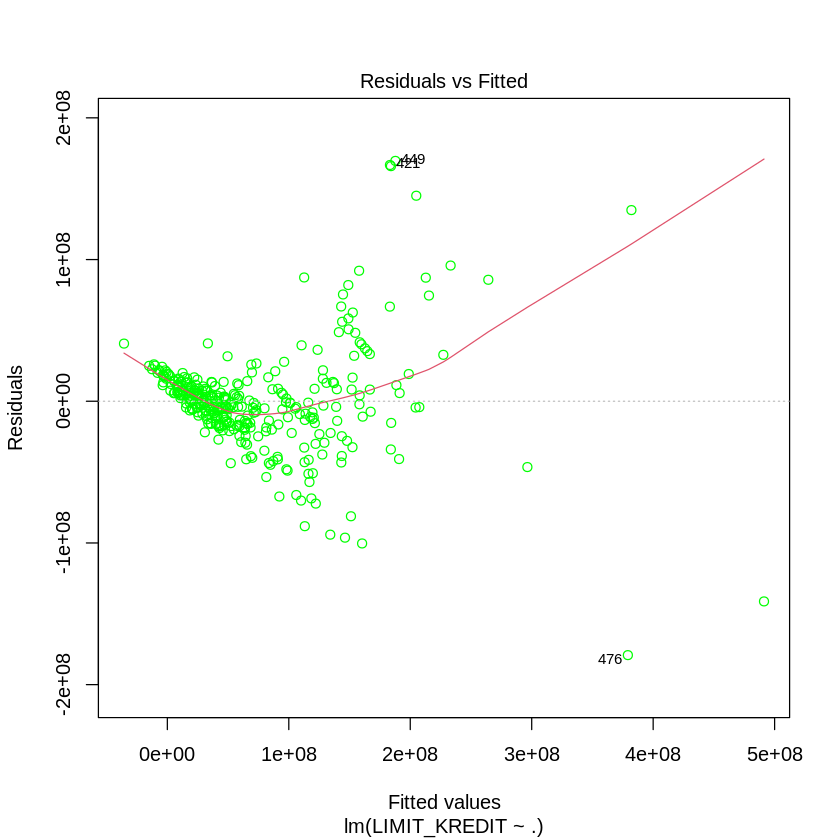

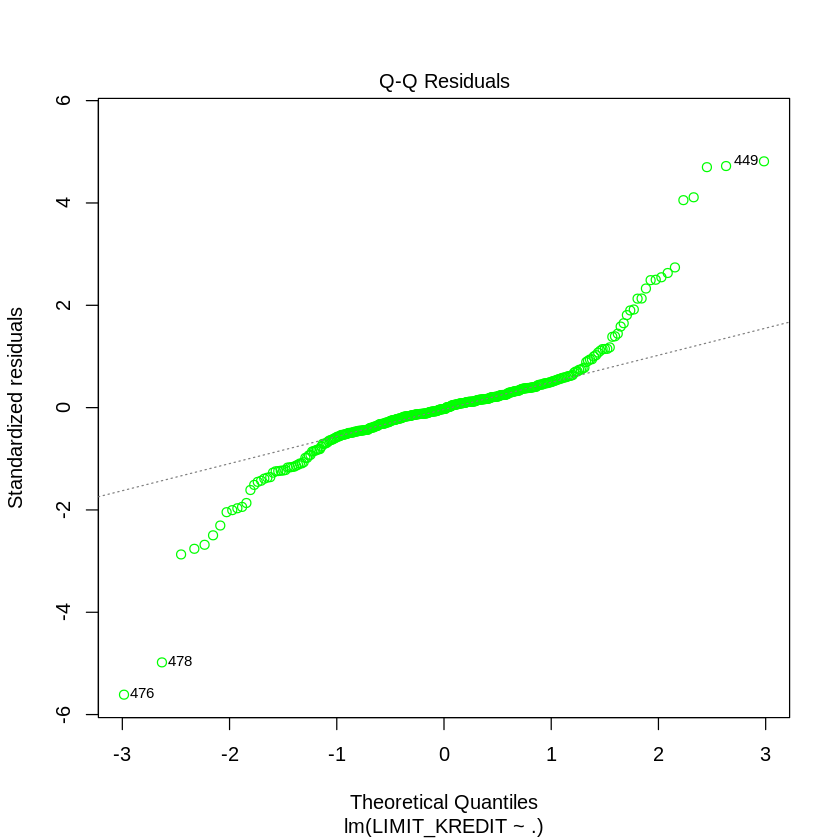

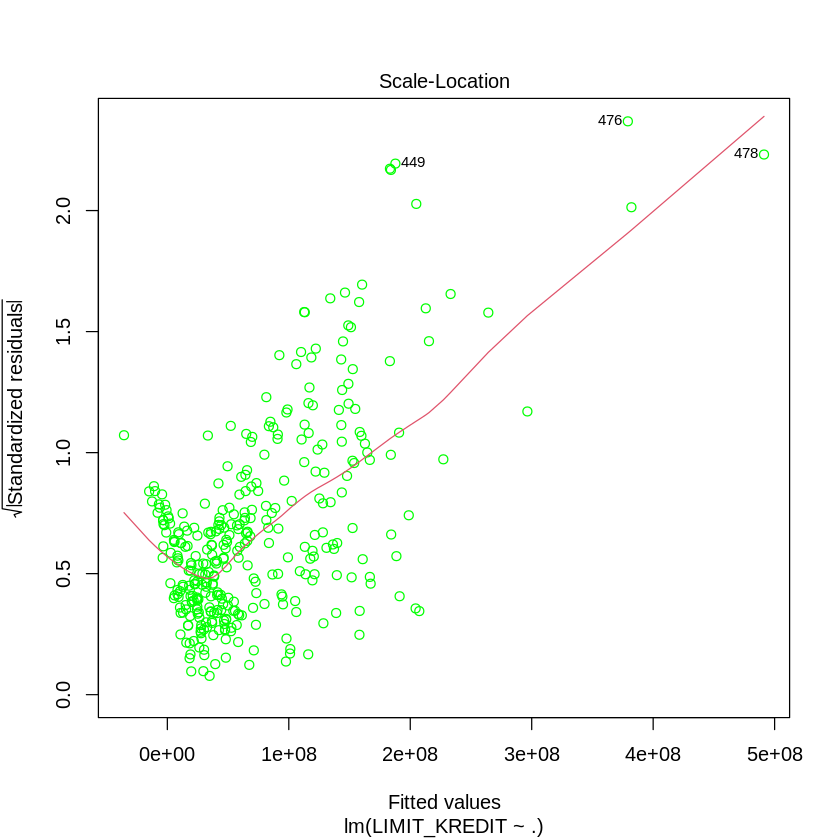

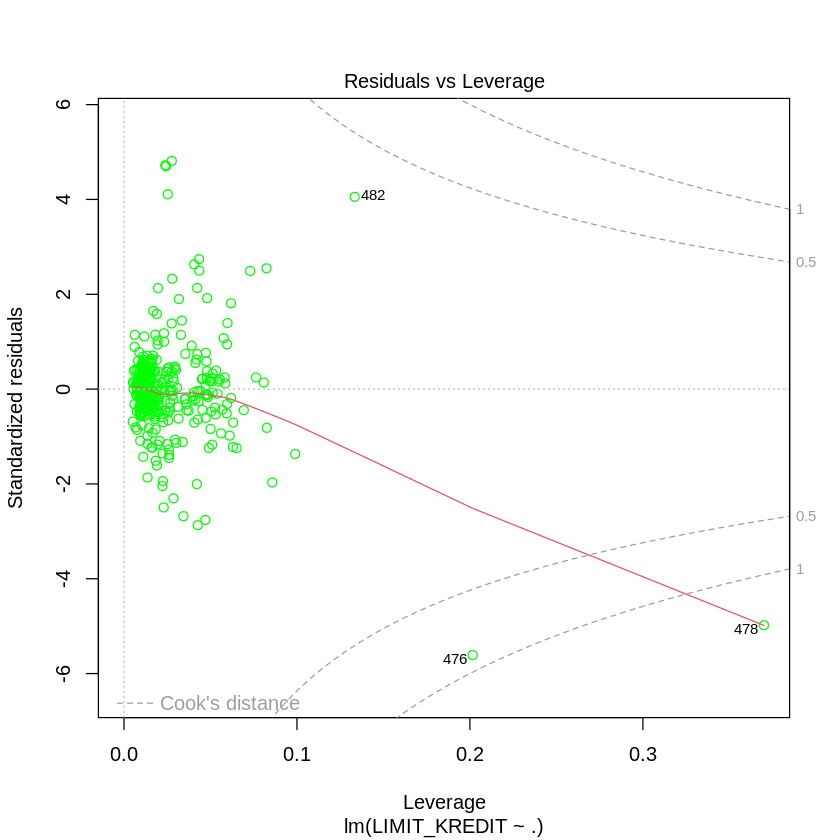

In [ ]:
#Menampilkan plot-plot residual
plot(model.mul.1, col="green")

Dari dua plot pertama di terlihat bahwa ragam residual tidak bersifat homogen dan residual tidak berdistribusi normal.

##Model 2 (Transformasi Logaritma)

Pada bagian sebelumnya, diketahui bahwa variabel `LIMIT_KREDIT` memiliki kecenderungan menjulur ke kanan. Oleh karena itu, pada model yang kedua ini akan dilakukan Transformasi Log terhadap variabel `LIMIT_KREDIT`.

In [ ]:
data.latih.log <- data.frame(data.latih)
data.latih.log$LIMIT_KREDIT <- log(data.latih.log$LIMIT_KREDIT)

model.mul.2 <- lm(LIMIT_KREDIT ~ ., data=data.latih.log)
summary(model.mul.2)


Call:
lm(formula = LIMIT_KREDIT ~ ., data = data.latih.log)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.02123 -0.22755  0.02115  0.27282  0.96238 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              1.582e+01  1.661e-01  95.241  < 2e-16 ***
USIA                    -1.654e-03  3.956e-03  -0.418  0.67604    
JML_TANGGUNGAN           3.243e-02  2.146e-02   1.511  0.13175    
PEKERJAANPegawai swasta -2.726e-01  8.184e-02  -3.331  0.00096 ***
PEKERJAANPNS            -1.808e-01  1.054e-01  -1.716  0.08711 .  
LAMA_BEKERJA             1.182e-02  4.463e-03   2.649  0.00844 ** 
PENGHASILAN              7.350e-08  4.007e-09  18.341  < 2e-16 ***
DBR                      2.284e+00  1.780e-01  12.829  < 2e-16 ***
WAKTU_KREDIT             1.414e-02  8.401e-04  16.835  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4045 on 343 degrees of freedom
Multiple R-squared:  0.7

Model 2 memiliki niali $R^2$ sedikit lebih besar dari model sebelumnya yaitu $78\%$. Selanjutnya, akan dicek apakah residualnya memenuhi asumsi-asumsi pada regresi linier.

### Cek Asumsi

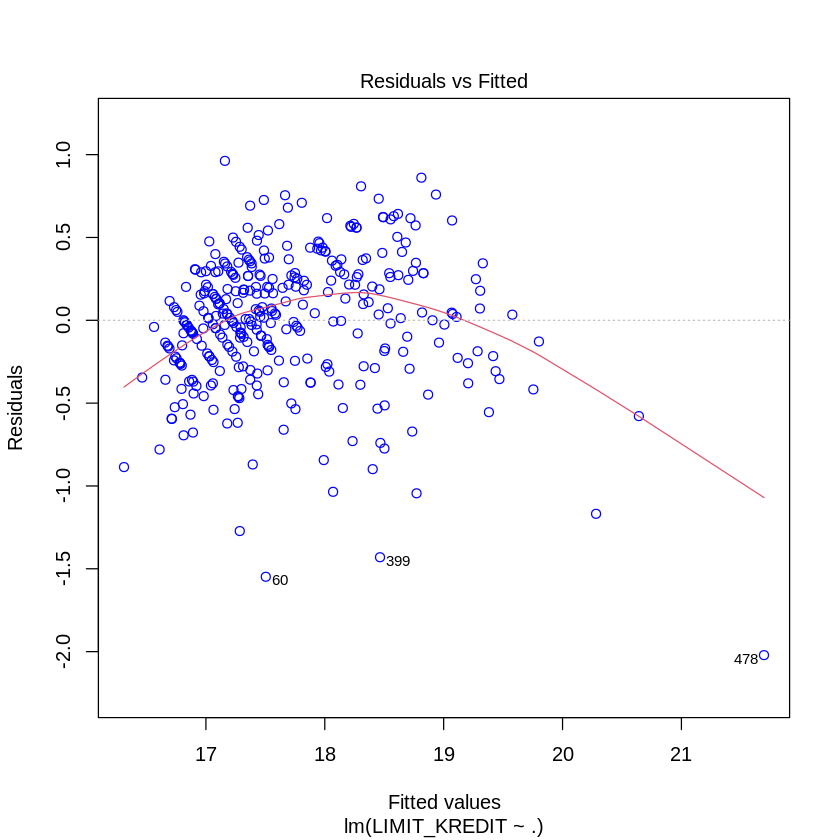

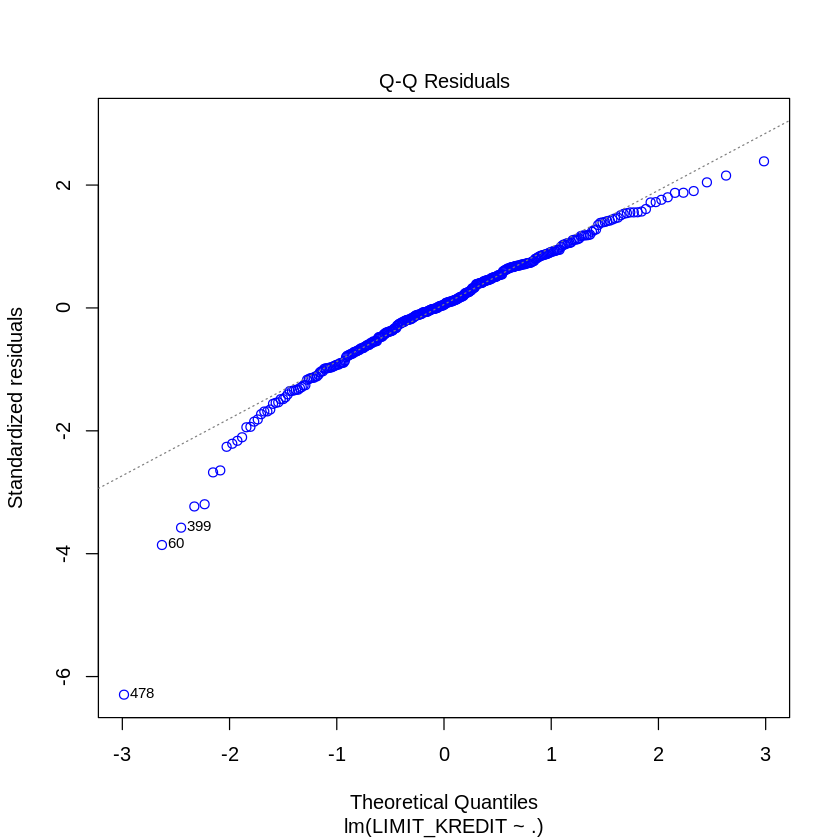

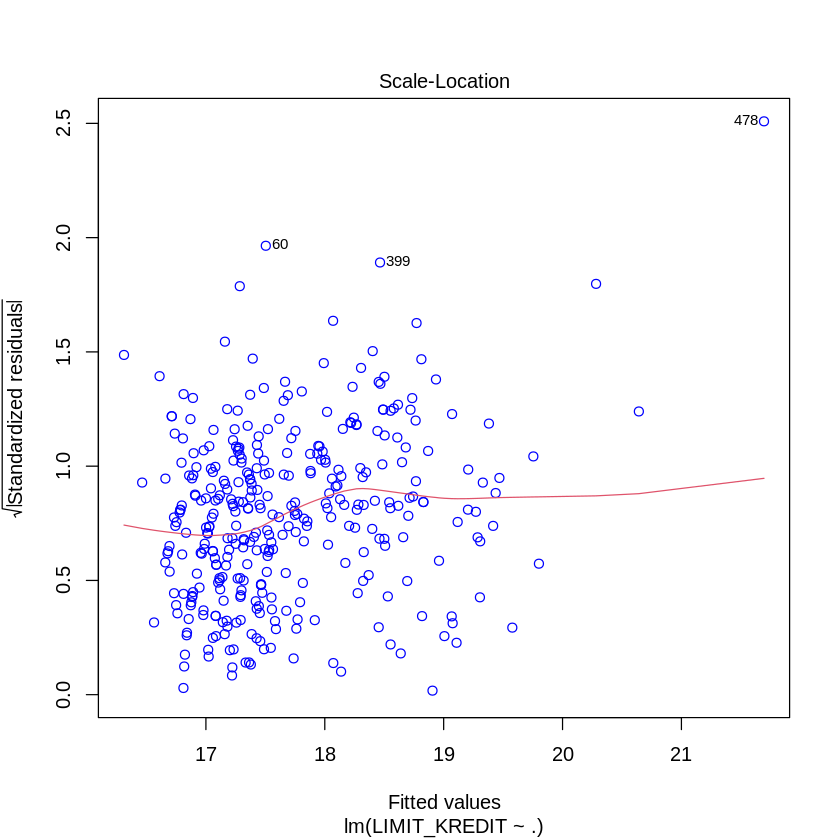

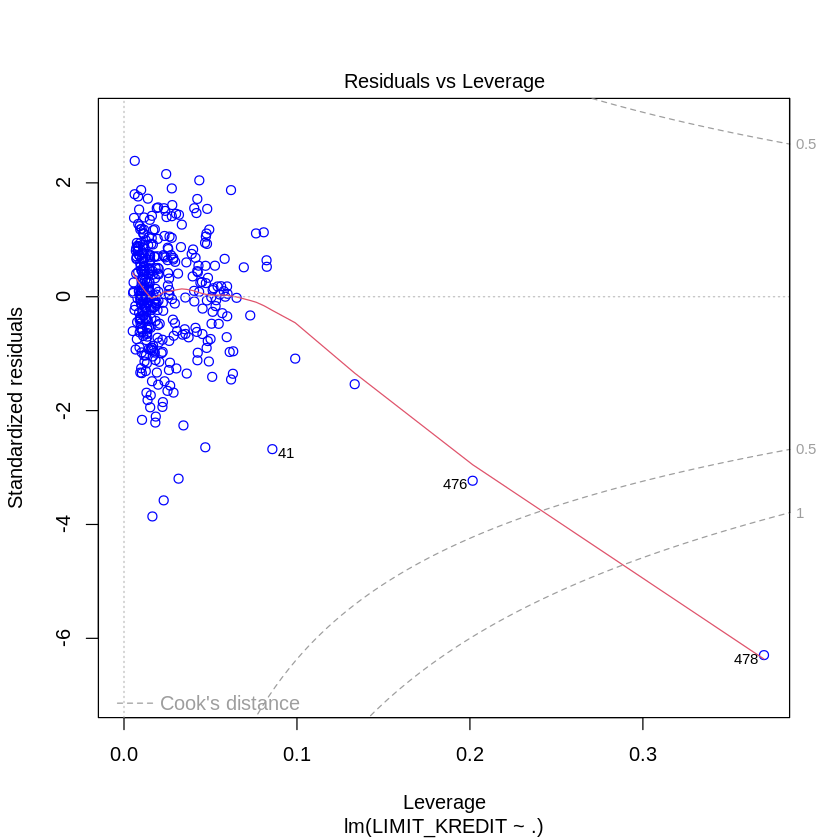

In [ ]:
plot(model.mul.2, col="blue")


	Shapiro-Wilk normality test

data:  res
W = 0.96339, p-value = 1.026e-07


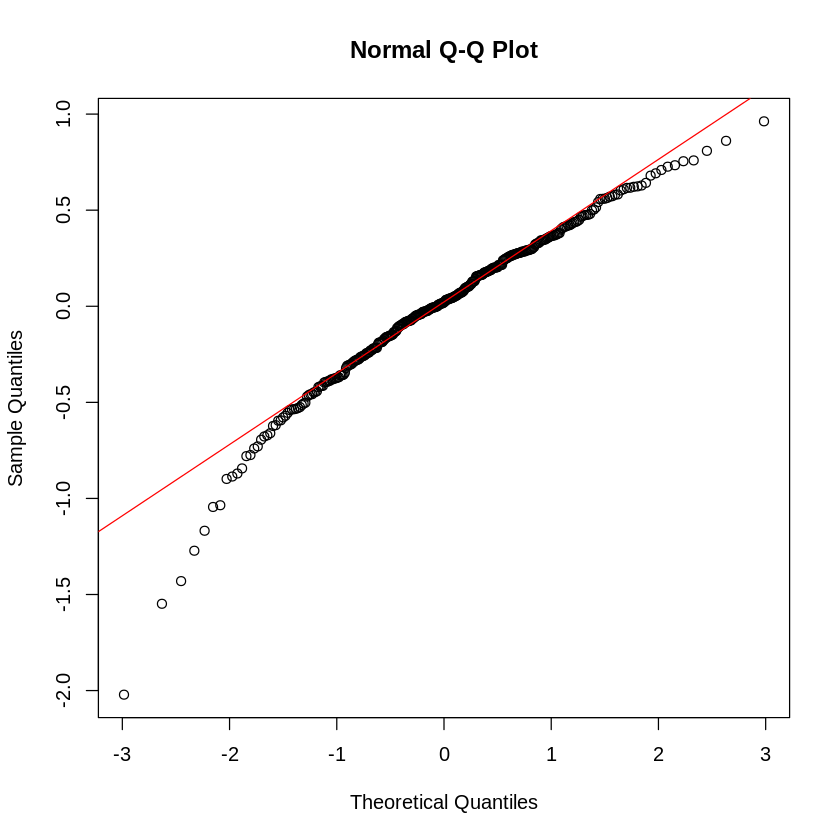

In [ ]:
#Uji kenormalan residual
# Menghitung nilai residual dari model.2
res <- residuals(model.mul.2)

# Membuat Kurva Normal QQ Plot
qqnorm(res)
qqline(res, col="red")

# Mengecek apakah residual menyebar Normal
shapiro.test(res)

Oleh karena p-value < 5% maka dapat disimpulkan residual tidak berdistribusi normal.

In [ ]:
# Uji kehomogenan ragam
lmtest::gqtest(model.mul.2)


	Goldfeld-Quandt test

data:  model.mul.2
GQ = 1.2396, df1 = 167, df2 = 167, p-value = 0.08313
alternative hypothesis: variance increases from segment 1 to 2


Oleh karena p-value = 0.08 > 5% maka ragam residual bersifat homogen.

In [ ]:
# Uji kebebasan residual
lmtest::dwtest(model.mul.2)  #Tolak H0: Terdapat Autokorelasi (Tidak Bebas)


	Durbin-Watson test

data:  model.mul.2
DW = 2.0572, p-value = 0.7083
alternative hypothesis: true autocorrelation is greater than 0


In [ ]:
# Cek Multikolinieritas
car::vif(model.mul.2)

,GVIF,Df,GVIF^(1/(2*Df))
USIA,2.484017,1,1.576076
JML_TANGGUNGAN,1.581392,1,1.257534
PEKERJAAN,1.253406,2,1.058091
LAMA_BEKERJA,1.740993,1,1.319467
PENGHASILAN,1.195344,1,1.093318
DBR,1.233193,1,1.110492
WAKTU_KREDIT,1.254545,1,1.120065


Oleh karena nilai VIF dari semua variabel prediktor di bawah 5, maka tidak terjadi multikolinieritas.

#Evaluasi Model

In [ ]:
# Fungsi menghitung R-Squared
r.squared <- function(y.true, y.pred){
  SST <- sum((y.true - mean(y.true))^2)   # Menghitung sum of squares total
  SSR <- sum((y.true - y.pred)^2)         # Menghitung sum of squares residual
  R_squared <- 1 - (SSR / SST)            # Menghitung R-squared
  return(R_squared)
}

# Fungsi menghitung RMSE
rmse <- function(y.true, y.pred) {
  sqrt(mean((y.true - y.pred)^2))
}

# Fungsi menghitung MAE
mae <- function(y.true, y.pred) {
  mean(abs(y.true - y.pred))
}

# Fungsi menghitung MAPE
mape <- function(y.true, y.pred){
  mean(abs((y.true - y.pred) / y.true)) * 100
}

### Model Mul 1

In [ ]:
y.true.1 <- as.vector(data.uji$LIMIT_KREDIT)
y.pred.1 <- as.vector(predict(model.mul.1, newdata = data.uji[-1]))  # Membuat prediksi pada data uji

# Menampilkan ukuran performa model
cat("R-Squared (Test):", r.squared(y.true.1, y.pred.1), "\n")
cat("MAE (Test):", mae(y.true.1, y.pred.1), "\n")
cat("RMSE (Test):", rmse(y.true.1, y.pred.1), "\n")
cat("MAPE (Test):", mape(y.true.1, y.pred.1), "\n")

R-Squared (Test): 0.7385814 
MAE (Test): 28076409 
RMSE (Test): 46022238 
MAPE (Test): 53.59849 


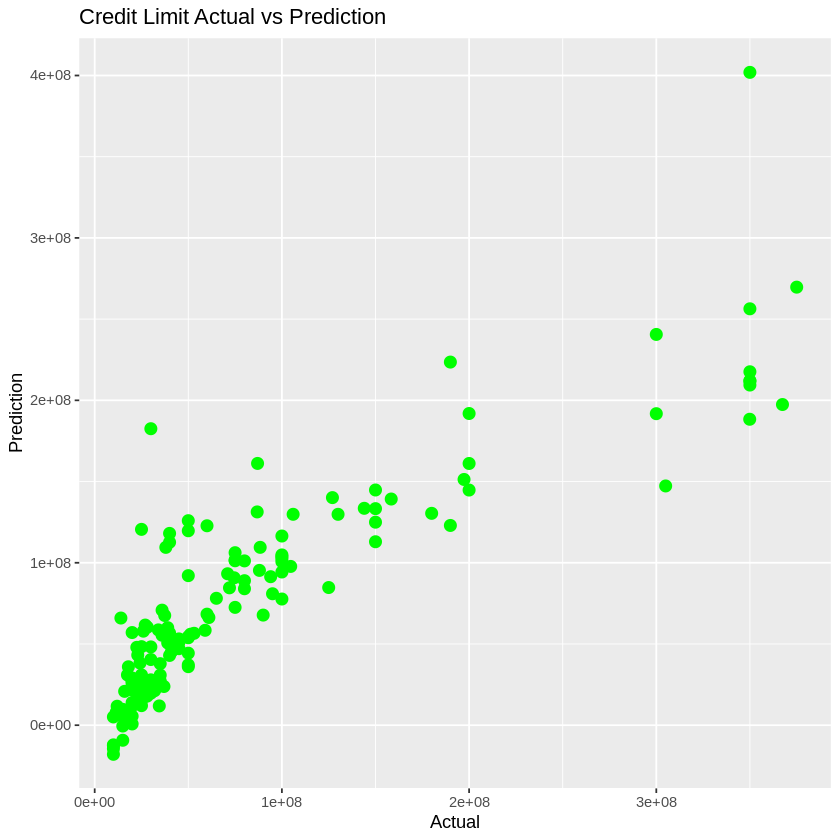

In [ ]:
# Plot
y.model.1 <- data.frame (y.true.1, y.pred.1)
ggplot(data = y.model.1, aes(y.true.1, y.pred.1)) +
  geom_point(color = "green", size=3) +
  labs(x = "Actual", y = "Prediction", title="Credit Limit Actual vs Prediction")

### Model Mul 2

In [ ]:
data.uji.log <- data.frame(data.uji)
data.uji.log$LIMIT_KREDIT <- log(data.uji.log$LIMIT_KREDIT)

y.true.2 <- as.vector(data.uji.log$LIMIT_KREDIT)
y.pred.2 <- as.vector(predict(model.mul.2, newdata = data.uji.log[-1]))  # Membuat prediksi pada data uji

# Menampilkan ukuran performa model
cat("R-Squared (Test):", r.squared(y.true.2, y.pred.2), "\n")
cat("MAE (Test):", mae(exp(y.true.2), exp(y.pred.2)), "\n")
cat("RMSE (Test):", rmse(exp(y.true.2), exp(y.pred.2)), "\n")
cat("MAPE (Test):", mape(exp(y.true.2), exp(y.pred.2)), "\n")

R-Squared (Test): 0.7983426 
MAE (Test): 28034485 
RMSE (Test): 66439352 
MAPE (Test): 37.16819 


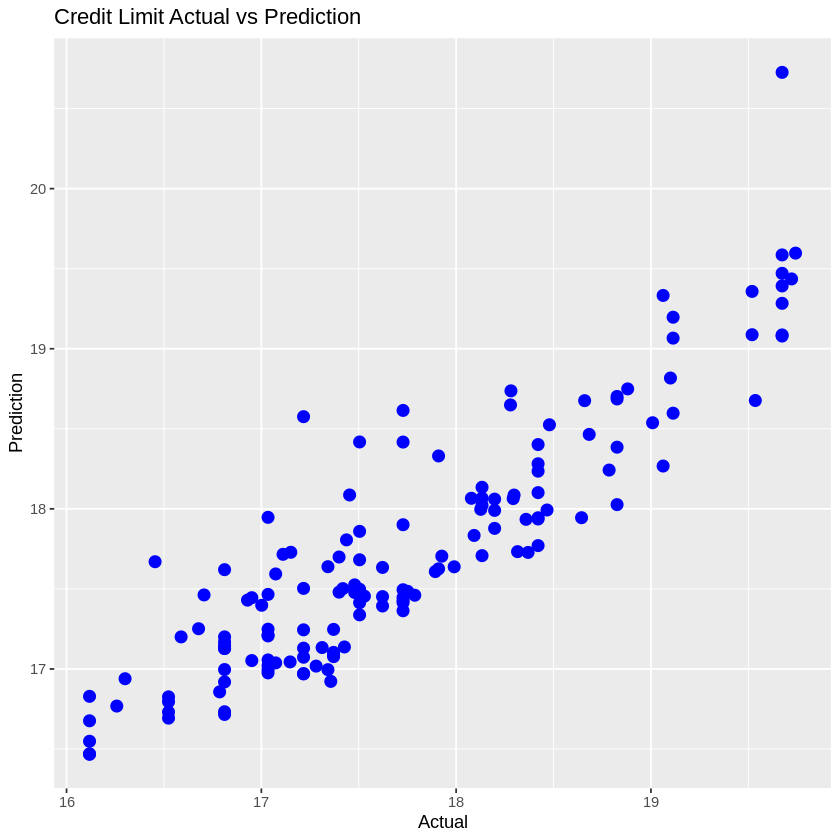

In [ ]:
# Plot
y.model.2 <- data.frame (y.true.2, y.pred.2)
ggplot(data = y.model.2, aes(y.true.2, y.pred.2)) +
  geom_point(color = "blue", size= 3) +
  labs(x="Actual", y="Prediction", title="Credit Limit Actual vs Prediction")

# Kesimpulan

Dari hasil evaluasi, model regresi linier berganda yang kedua atau `model.mul.2` adalah model yang terbaik dengan nilai $R^2$ dari data latih dan data uji masing-masing sebesar $78\%$ dan $80\%$ (tidak terjadi overfitting).

In [ ]:
summary(model.mul.2)


Call:
lm(formula = LIMIT_KREDIT ~ ., data = data.latih.log)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.02123 -0.22755  0.02115  0.27282  0.96238 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              1.582e+01  1.661e-01  95.241  < 2e-16 ***
USIA                    -1.654e-03  3.956e-03  -0.418  0.67604    
JML_TANGGUNGAN           3.243e-02  2.146e-02   1.511  0.13175    
PEKERJAANPegawai swasta -2.726e-01  8.184e-02  -3.331  0.00096 ***
PEKERJAANPNS            -1.808e-01  1.054e-01  -1.716  0.08711 .  
LAMA_BEKERJA             1.182e-02  4.463e-03   2.649  0.00844 ** 
PENGHASILAN              7.350e-08  4.007e-09  18.341  < 2e-16 ***
DBR                      2.284e+00  1.780e-01  12.829  < 2e-16 ***
WAKTU_KREDIT             1.414e-02  8.401e-04  16.835  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4045 on 343 degrees of freedom
Multiple R-squared:  0.7

**Interpretasi Model**

Diketahui model dibentuk menggunakan tujuh variabel prediktor yaitu USIA, JML_TANGGUNGAN, PEKERJAAN, LAMA_BEKERJA, PENGHASILAN, DBR, dan WAKTU_KREDIT serta satu variabel respon yaitu LIMIT_KREDIT. Model menghasilkan nilai p-value < 2.2e-16, dengan demikian ketujuh variabel prediktor secara simultan berpengaruh signifikan terhadap LIMIT_KREDIT. Namun, secara individual variabel USIA dan JML_TANGGUNGAN tidak berpengaruh signifikan terhadap LIMIT_KREDIT. Sementara variabel yang lain secara individual berpengaruh signifikan terhadap LIMIT_KREDIT.

Model memiliki intersep sama dengan 15, ini adalah nilai log(LIMIT_KREDIT) saat nilai semua variabel prediktor sama dengan nol. Perlu diingat bahwa pada model ini nilai LIMIT_KREDIT yang digunakan adalah nilai setelah di-logaritma-kan.

Variabel USIA memiliki koefisien -0.00165, artinya jika nilai variabel USIA naik satu satuan maka nilai log(LIMIT_KREDIT) turun sebesar -0.00165.

Variabel JML_TANGGUNGAN memiliki koefisien 0.0324, artinya jika nilai variabel JML_TANGGUNGAN naik satu satuan maka nilai log(LIMIT_KREDIT) naik sebesar 0.0324.

Interpretasi dari koefisien variabel yang lain analog.